# TOPSIS Assignment

**Name:** Shantanu Singhal  
**Project:** TOPSIS Web Service

## 1. Methodology
TOPSIS (Technique for Order of Preference by Similarity to Ideal Solution) is a multi-criteria decision analysis method. 
The method is based on finding an alternative that should have the shortest distance from the positive ideal solution (PIS) and the longest distance from the negative ideal solution (NIS).

### Steps:
1. **Create an evaluation matrix** consisting of $m$ alternatives and $n$ criteria.
2. **Normalize the decision matrix** so that valid comparisons can be made between criteria with different units.
3. **Calculate the weighted normalized decision matrix** by multiplying the normalized scores by the geometric weights.
4. **Determine the positive ideal and negative ideal solutions**.
5. **Calculate the separation measures** (distance from PIS and NIS).
6. **Calculate the relative closeness to the ideal solution**.
7. **Rank the preference order**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data
data_path = 'data.csv'
df = pd.read_csv(data_path)

# Display first few rows
df.head()

,Fund Name,P1,P2,P3,P4,P5
0,M1,0.68,0.46,5.1,68.0,18.56
1,M2,0.80,0.64,4.2,39.8,11.36
2,M3,0.66,0.44,4.8,46.6,13.13
3,M4,0.64,0.41,4.0,69.0,18.51
4,M5,0.68,0.46,5.0,56.9,15.76


In [2]:
# Preprocessing
# Extracting content for calculation
# Assuming first column is the Name/Model and rest are numeric criteria
fund_names = df.iloc[:, 0].values
data_values = df.iloc[:, 1:].values.astype(float)

# Defining Weights and Impacts (Assumed for this assignment/demo)
# Adjust these lists based on specific requirement or user input logic
num_criteria = data_values.shape[1]
weights = [1.0] * num_criteria # Equal weights
impacts = ['+'] * num_criteria # All beneficial criteria by default

# Example specific updates (Modify as needed)
# weights = [0.25, 0.25, 0.25, 0.25]
# impacts = ['+', '+', '-', '+']

print("Weights:", weights)
print("Impacts:", impacts)

Weights: [1.0, 1.0, 1.0, 1.0, 1.0]
Impacts: ['+', '+', '+', '+', '+']


In [3]:
# 2. Vector Normalization
rss = np.sqrt(np.sum(data_values**2, axis=0))
normalized_data = data_values / rss

pd.DataFrame(normalized_data, columns=df.columns[1:]).head()

,P1,P2,P3,P4,P5
0,0.340763,0.317756,0.401165,0.424554,0.422575
1,0.400898,0.442095,0.330371,0.248489,0.258645
2,0.330741,0.303940,0.377567,0.290945,0.298945
3,0.320718,0.283217,0.314639,0.430798,0.421437
4,0.340763,0.317756,0.393299,0.355252,0.358825


In [4]:
# 3. Weighted Normalization
weighted_data = normalized_data * weights

pd.DataFrame(weighted_data, columns=df.columns[1:]).head()

,P1,P2,P3,P4,P5
0,0.340763,0.317756,0.401165,0.424554,0.422575
1,0.400898,0.442095,0.330371,0.248489,0.258645
2,0.330741,0.303940,0.377567,0.290945,0.298945
3,0.320718,0.283217,0.314639,0.430798,0.421437
4,0.340763,0.317756,0.393299,0.355252,0.358825


In [5]:
# 4. Ideal Best and Ideal Worst
ideal_best = []
ideal_worst = []

for i in range(num_criteria):
    if impacts[i] == '+':
        ideal_best.append(np.max(weighted_data[:, i]))
        ideal_worst.append(np.min(weighted_data[:, i]))
    else:
        ideal_best.append(np.min(weighted_data[:, i]))
        ideal_worst.append(np.max(weighted_data[:, i]))

print("Ideal Best:", ideal_best)
print("Ideal Worst:", ideal_worst)

Ideal Best: [np.float64(0.4309653662213453), np.float64(0.5111721249795514), np.float64(0.44049448539050756), np.float64(0.430797899433912), np.float64(0.42257535956549713)]
Ideal Worst: [np.float64(0.3157071868830785), np.float64(0.2763092567457035), np.float64(0.24384516155545954), np.float64(0.24848922315173474), np.float64(0.25864526318233017)]


In [6]:
# 5. Euclidean Distance
s_best = np.sqrt(np.sum((weighted_data - ideal_best)**2, axis=1))
s_worst = np.sqrt(np.sum((weighted_data - ideal_worst)**2, axis=1))

In [7]:
# 6. Performance Score (Topsis Score)
performance_score = s_worst / (s_best + s_worst)

# 7. Rank
# Add scores to original dataframe
df['Topsis Score'] = performance_score
df['Rank'] = df['Topsis Score'].rank(ascending=False)

# Show Result Table
df.sort_values(by='Rank')

,Fund Name,P1,P2,P3,P4,P5,Topsis Score,Rank
7,M8,0.86,0.74,5.6,43.9,12.78,0.617150,1.0
0,M1,0.68,0.46,5.1,68.0,18.56,0.573135,2.0
3,M4,0.64,0.41,4.0,69.0,18.51,0.473791,3.0
4,M5,0.68,0.46,5.0,56.9,15.76,0.472353,4.0
5,M6,0.66,0.44,3.6,65.5,17.55,0.438808,5.0
1,M2,0.80,0.64,4.2,39.8,11.36,0.424033,6.0
2,M3,0.66,0.44,4.8,46.6,13.13,0.330144,7.0
6,M7,0.63,0.40,3.1,55.3,14.86,0.264490,8.0


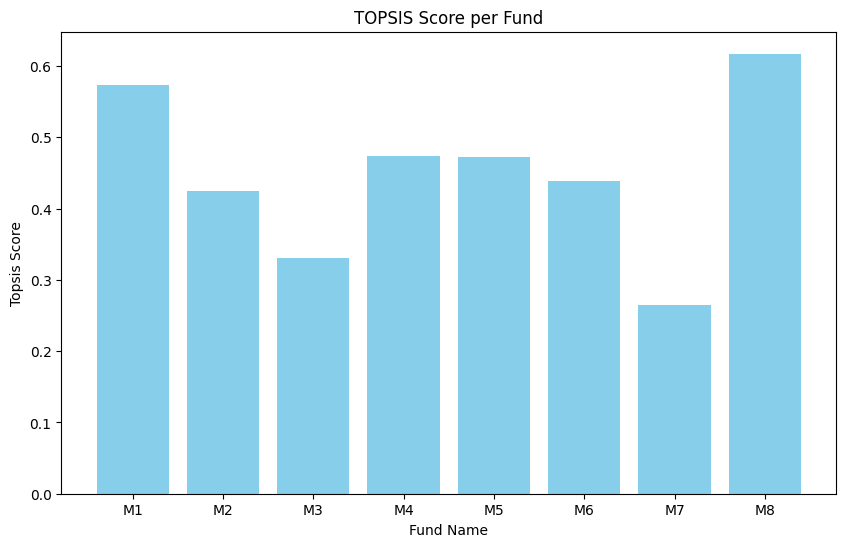

In [8]:
# Result Graph
plt.figure(figsize=(10, 6))
plt.bar(df.iloc[:, 0], df['Topsis Score'], color='skyblue')
plt.xlabel('Fund Name')
plt.ylabel('Topsis Score')
plt.title('TOPSIS Score per Fund')
plt.show()